In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import plot_model

import pickle

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# prepare gray scale data
data_gray_file = open('./archiv/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archiv/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)

In [3]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [4]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


# Initiales Netz mit 1 Hidden Layer

activation = relu
loss = categorial_crossentropy
optimizer = adam

Epoch 1/20
680/680 [==============================] - 5s 6ms/step - loss: 1.9125 - accuracy: 0.5741 - val_loss: 1.1668 - val_accuracy: 0.7042
Epoch 2/20
680/680 [==============================] - 4s 7ms/step - loss: 0.9278 - accuracy: 0.8226 - val_loss: 0.9013 - val_accuracy: 0.7781
Epoch 3/20
680/680 [==============================] - 4s 5ms/step - loss: 0.7323 - accuracy: 0.8631 - val_loss: 0.7967 - val_accuracy: 0.8143
Epoch 4/20
680/680 [==============================] - 4s 6ms/step - loss: 0.6472 - accuracy: 0.8796 - val_loss: 0.7545 - val_accuracy: 0.8298
Epoch 5/20
680/680 [==============================] - 4s 6ms/step - loss: 0.5897 - accuracy: 0.8907 - val_loss: 0.7625 - val_accuracy: 0.8203
Epoch 6/20
680/680 [==============================] - 4s 5ms/step - loss: 0.5497 - accuracy: 0.8972 - val_loss: 0.7386 - val_accuracy: 0.8348
Epoch 7/20
680/680 [==============================] - 4s 5ms/step - loss: 0.5158 - accuracy: 0.9016 - val_loss: 0.7231 - val_accuracy: 0.8404
Epoch 

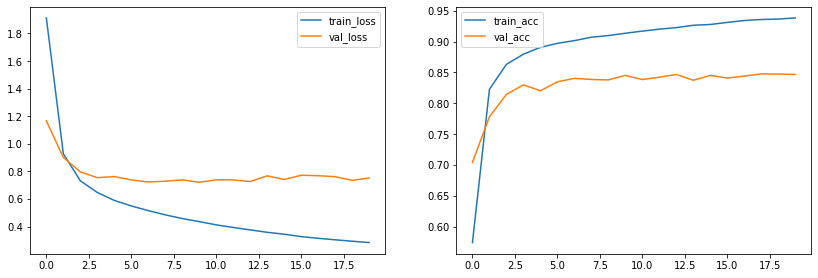

In [6]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=20, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Änderung an Epochs und Neuronen 
Epochs = 100 
Dense = 86 * 2 = 172

Epoch 1/50
680/680 [==============================] - 8s 7ms/step - loss: 1.5957 - accuracy: 0.6556 - val_loss: 0.9595 - val_accuracy: 0.7530
Epoch 2/50
680/680 [==============================] - 5s 7ms/step - loss: 0.7854 - accuracy: 0.8523 - val_loss: 0.7696 - val_accuracy: 0.8181
Epoch 3/50
680/680 [==============================] - 5s 7ms/step - loss: 0.6369 - accuracy: 0.8813 - val_loss: 0.7206 - val_accuracy: 0.8380
Epoch 4/50
680/680 [==============================] - 4s 6ms/step - loss: 0.5516 - accuracy: 0.8952 - val_loss: 0.7304 - val_accuracy: 0.8377
Epoch 5/50
680/680 [==============================] - 5s 7ms/step - loss: 0.4836 - accuracy: 0.9072 - val_loss: 0.6832 - val_accuracy: 0.8501
Epoch 6/50
680/680 [==============================] - 5s 7ms/step - loss: 0.4258 - accuracy: 0.9163 - val_loss: 0.7140 - val_accuracy: 0.8462
Epoch 7/50
680/680 [==============================] - 4s 7ms/step - loss: 0.3767 - accuracy: 0.9241 - val_loss: 0.6766 - val_accuracy: 0.8448
Epoch 

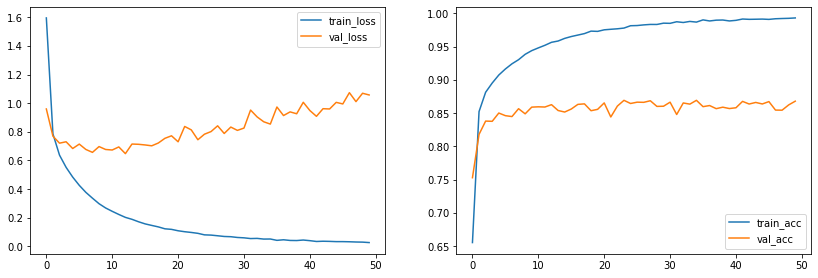

In [7]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=50, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

val_loss steigt stark -> overfitting

#### Änderungen

Versuch durch mehr Neuronen + Epochs overfitting zu umgehen
Dense = 344 (172*2)
Epoch = 100

Epoch 1/100
680/680 [==============================] - 7s 9ms/step - loss: 1.4104 - accuracy: 0.6930 - val_loss: 0.8695 - val_accuracy: 0.7850
Epoch 2/100
680/680 [==============================] - 8s 12ms/step - loss: 0.6655 - accuracy: 0.8725 - val_loss: 0.7378 - val_accuracy: 0.8158
Epoch 3/100
680/680 [==============================] - 10s 15ms/step - loss: 0.5225 - accuracy: 0.8967 - val_loss: 0.7135 - val_accuracy: 0.8319
Epoch 4/100
680/680 [==============================] - 6s 9ms/step - loss: 0.4231 - accuracy: 0.9153 - val_loss: 0.6961 - val_accuracy: 0.8395
Epoch 5/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3514 - accuracy: 0.9279 - val_loss: 0.6419 - val_accuracy: 0.8534
Epoch 6/100
680/680 [==============================] - 6s 9ms/step - loss: 0.2935 - accuracy: 0.9383 - val_loss: 0.6074 - val_accuracy: 0.8656
Epoch 7/100
680/680 [==============================] - 6s 9ms/step - loss: 0.2511 - accuracy: 0.9459 - val_loss: 0.6648 - val_accuracy: 0.8

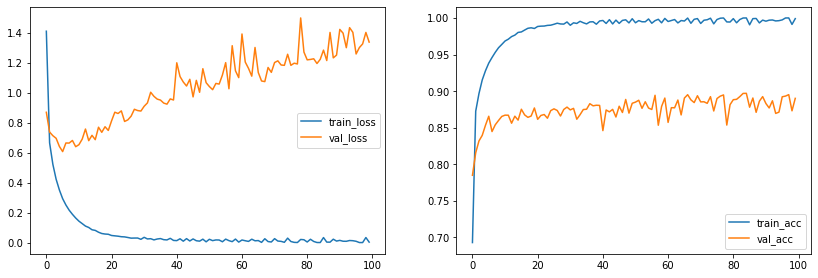

In [8]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Dropout

nun fügen wir einen Dropout dem Netz hinzu und beobachten val_loss und val_accuracy 

Ziel -> kein overfitting

Epoch 1/100
680/680 [==============================] - 7s 10ms/step - loss: 2.0221 - accuracy: 0.4876 - val_loss: 1.0507 - val_accuracy: 0.7568
Epoch 2/100
680/680 [==============================] - 6s 9ms/step - loss: 1.0628 - accuracy: 0.7456 - val_loss: 0.7699 - val_accuracy: 0.8178
Epoch 3/100
680/680 [==============================] - 7s 10ms/step - loss: 0.8480 - accuracy: 0.7932 - val_loss: 0.6857 - val_accuracy: 0.8409
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.7337 - accuracy: 0.8197 - val_loss: 0.6118 - val_accuracy: 0.8512
Epoch 5/100
680/680 [==============================] - 7s 10ms/step - loss: 0.6646 - accuracy: 0.8331 - val_loss: 0.5758 - val_accuracy: 0.8641
Epoch 6/100
680/680 [==============================] - 7s 11ms/step - loss: 0.6086 - accuracy: 0.8453 - val_loss: 0.5576 - val_accuracy: 0.8733
Epoch 7/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5738 - accuracy: 0.8533 - val_loss: 0.5297 - val_accuracy: 

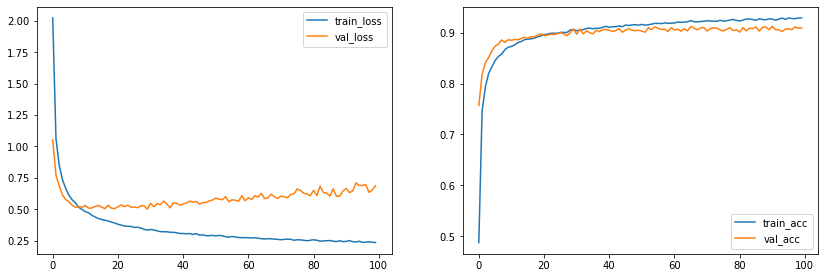

In [9]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Änderung Droprate

Overfitting stark zurückgegangen -> Droprate nochmals anpassen
Droprate auf 0.3

Epoch 1/100
680/680 [==============================] - 7s 8ms/step - loss: 1.6538 - accuracy: 0.6050 - val_loss: 0.8899 - val_accuracy: 0.7892
Epoch 2/100
680/680 [==============================] - 7s 11ms/step - loss: 0.7943 - accuracy: 0.8254 - val_loss: 0.7025 - val_accuracy: 0.8272
Epoch 3/100
680/680 [==============================] - 10s 15ms/step - loss: 0.6021 - accuracy: 0.8645 - val_loss: 0.6427 - val_accuracy: 0.8407
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.5047 - accuracy: 0.8836 - val_loss: 0.5990 - val_accuracy: 0.8550
Epoch 5/100
680/680 [==============================] - 6s 9ms/step - loss: 0.4318 - accuracy: 0.8973 - val_loss: 0.5441 - val_accuracy: 0.8746
Epoch 6/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3844 - accuracy: 0.9076 - val_loss: 0.5385 - val_accuracy: 0.8773
Epoch 7/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3451 - accuracy: 0.9152 - val_loss: 0.5682 - val_accuracy: 0.

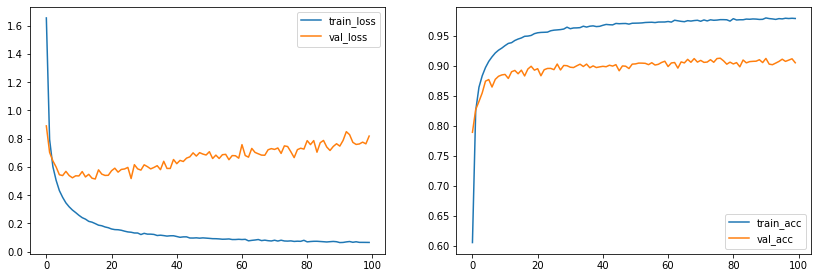

In [5]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray))


#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Epochs auf 60 reduzieren, genug aussagekraft basierend auf vorherigen Ergebnissen

val_loss stieg auch, daher Droprate wieder erhöhen

Droprate 0,4

Epoch = 60

Epoch 1/60
680/680 [==============================] - 8s 10ms/step - loss: 1.8934 - accuracy: 0.5285 - val_loss: 0.9612 - val_accuracy: 0.7794
Epoch 2/60
680/680 [==============================] - 6s 9ms/step - loss: 0.9513 - accuracy: 0.7796 - val_loss: 0.7030 - val_accuracy: 0.8348
Epoch 3/60
680/680 [==============================] - 6s 9ms/step - loss: 0.7391 - accuracy: 0.8258 - val_loss: 0.6370 - val_accuracy: 0.8455
Epoch 4/60
680/680 [==============================] - 6s 9ms/step - loss: 0.6376 - accuracy: 0.8467 - val_loss: 0.5942 - val_accuracy: 0.8586
Epoch 5/60
680/680 [==============================] - 6s 9ms/step - loss: 0.5631 - accuracy: 0.8627 - val_loss: 0.5639 - val_accuracy: 0.8716
Epoch 6/60
680/680 [==============================] - 6s 9ms/step - loss: 0.5129 - accuracy: 0.8738 - val_loss: 0.5452 - val_accuracy: 0.8713
Epoch 7/60
680/680 [==============================] - 6s 10ms/step - loss: 0.4752 - accuracy: 0.8812 - val_loss: 0.5565 - val_accuracy: 0.8724
Epoc

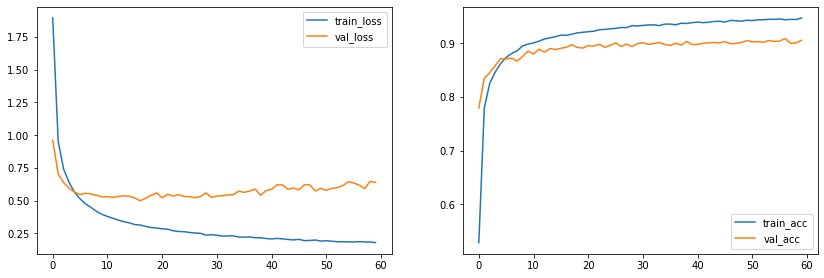

In [6]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

geringerer val_loss als bei Droprate 0.5 
jedoch auch geringere val_acc

# Vergleich von versch. Aktivierungsfunktionen

Aktivierungsfunktion sigmoid

Epoch 1/60
680/680 [==============================] - 9s 10ms/step - loss: 2.0524 - accuracy: 0.4887 - val_loss: 1.1378 - val_accuracy: 0.7206
Epoch 2/60
680/680 [==============================] - 7s 10ms/step - loss: 0.9829 - accuracy: 0.7679 - val_loss: 0.7802 - val_accuracy: 0.8083
Epoch 3/60
680/680 [==============================] - 7s 10ms/step - loss: 0.7327 - accuracy: 0.8295 - val_loss: 0.6606 - val_accuracy: 0.8378
Epoch 4/60
680/680 [==============================] - 6s 10ms/step - loss: 0.6032 - accuracy: 0.8596 - val_loss: 0.6139 - val_accuracy: 0.8480
Epoch 5/60
680/680 [==============================] - 6s 9ms/step - loss: 0.5223 - accuracy: 0.8775 - val_loss: 0.5850 - val_accuracy: 0.8520
Epoch 6/60
680/680 [==============================] - 6s 9ms/step - loss: 0.4579 - accuracy: 0.8913 - val_loss: 0.5457 - val_accuracy: 0.8633
Epoch 7/60
680/680 [==============================] - 6s 9ms/step - loss: 0.4116 - accuracy: 0.9012 - val_loss: 0.5224 - val_accuracy: 0.8732
Ep

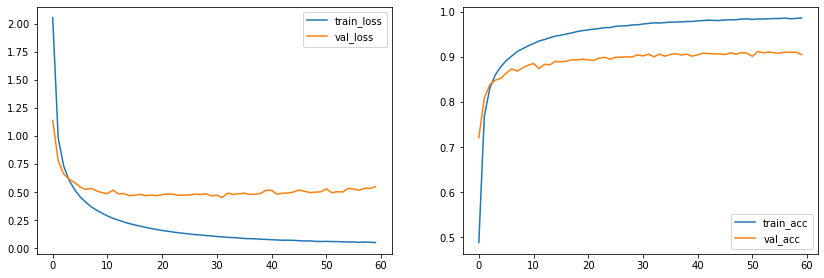

In [8]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(344, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

val_loss + val_acc besser als relu

# Vergleich von versch. Optimizern

initial = adam

adagrad

adadelta

Epoch 1/60
680/680 [==============================] - 8s 10ms/step - loss: 3.6915 - accuracy: 0.0605 - val_loss: 3.5217 - val_accuracy: 0.1745
Epoch 2/60
680/680 [==============================] - 6s 9ms/step - loss: 3.4622 - accuracy: 0.1396 - val_loss: 3.3304 - val_accuracy: 0.2892
Epoch 3/60
680/680 [==============================] - 6s 9ms/step - loss: 3.2729 - accuracy: 0.2077 - val_loss: 3.1421 - val_accuracy: 0.3571
Epoch 4/60
680/680 [==============================] - 5s 8ms/step - loss: 3.0979 - accuracy: 0.2666 - val_loss: 2.9601 - val_accuracy: 0.4006
Epoch 5/60
680/680 [==============================] - 6s 9ms/step - loss: 2.9319 - accuracy: 0.3159 - val_loss: 2.7876 - val_accuracy: 0.4441
Epoch 6/60
680/680 [==============================] - 6s 8ms/step - loss: 2.7820 - accuracy: 0.3538 - val_loss: 2.6400 - val_accuracy: 0.4683
Epoch 7/60
680/680 [==============================] - 5s 8ms/step - loss: 2.6504 - accuracy: 0.3890 - val_loss: 2.5059 - val_accuracy: 0.4975
Epoch

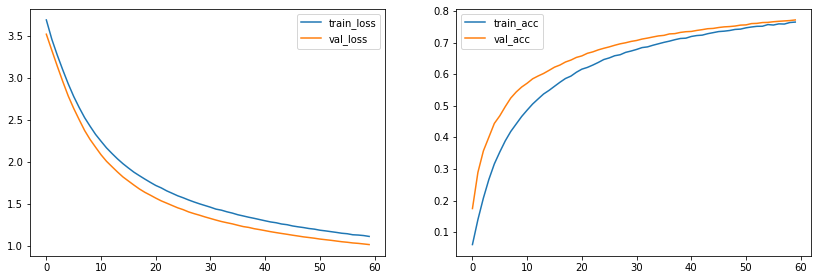

In [9]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Zum Vergleich nun Optimizer wieder ändern

optimizer = adadelta

Epoch 1/60
680/680 [==============================] - 7s 9ms/step - loss: 3.8940 - accuracy: 0.0259 - val_loss: 3.8160 - val_accuracy: 0.0257
Epoch 2/60
680/680 [==============================] - 7s 10ms/step - loss: 3.7980 - accuracy: 0.0322 - val_loss: 3.7380 - val_accuracy: 0.0456
Epoch 3/60
680/680 [==============================] - 6s 9ms/step - loss: 3.7436 - accuracy: 0.0404 - val_loss: 3.6910 - val_accuracy: 0.0681
Epoch 4/60
680/680 [==============================] - 6s 9ms/step - loss: 3.7057 - accuracy: 0.0498 - val_loss: 3.6575 - val_accuracy: 0.0809
Epoch 5/60
680/680 [==============================] - 6s 9ms/step - loss: 3.6736 - accuracy: 0.0586 - val_loss: 3.6314 - val_accuracy: 0.0966
Epoch 6/60
680/680 [==============================] - 6s 9ms/step - loss: 3.6476 - accuracy: 0.0674 - val_loss: 3.6087 - val_accuracy: 0.1142
Epoch 7/60
680/680 [==============================] - 6s 9ms/step - loss: 3.6203 - accuracy: 0.0784 - val_loss: 3.5875 - val_accuracy: 0.1296
Epoch

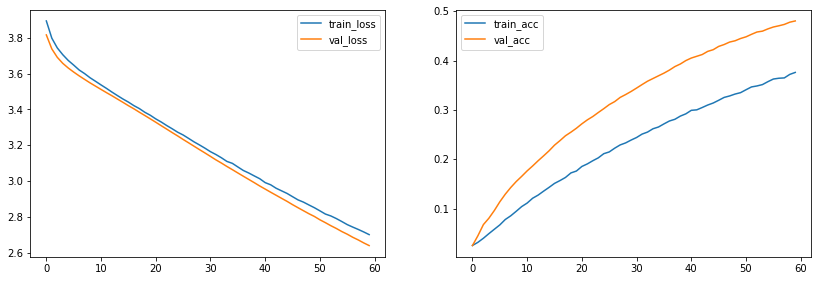

In [11]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Letzte Anpassungen

Dense

Epochs